## Hyperparameter Optimization For Xgboost using RandomizedSearchCV

In [1]:
import pandas as pd

In [2]:
## Read the Dataset

df=pd.read_csv('PreProcessed_Train_Data.csv')

In [3]:
df.head()

,A2,A5,A7,A8,A10,A11,A12,A13,A14,A1_a,...,A9_h,A9_j,A9_n,A9_o,A9_v,A9_z,A15_g,A15_p,A15_s,A16
0,30.83,0.00,0.0,1.0,1.25,1.0,1.0,0.0,202.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,58.67,4.46,560.0,1.0,3.04,1.0,6.0,0.0,43.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,24.50,0.50,824.0,0.0,1.50,1.0,0.0,0.0,280.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,27.83,1.54,3.0,1.0,3.75,1.0,5.0,1.0,100.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,25.00,11.25,1208.0,1.0,2.50,1.0,17.0,0.0,200.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1


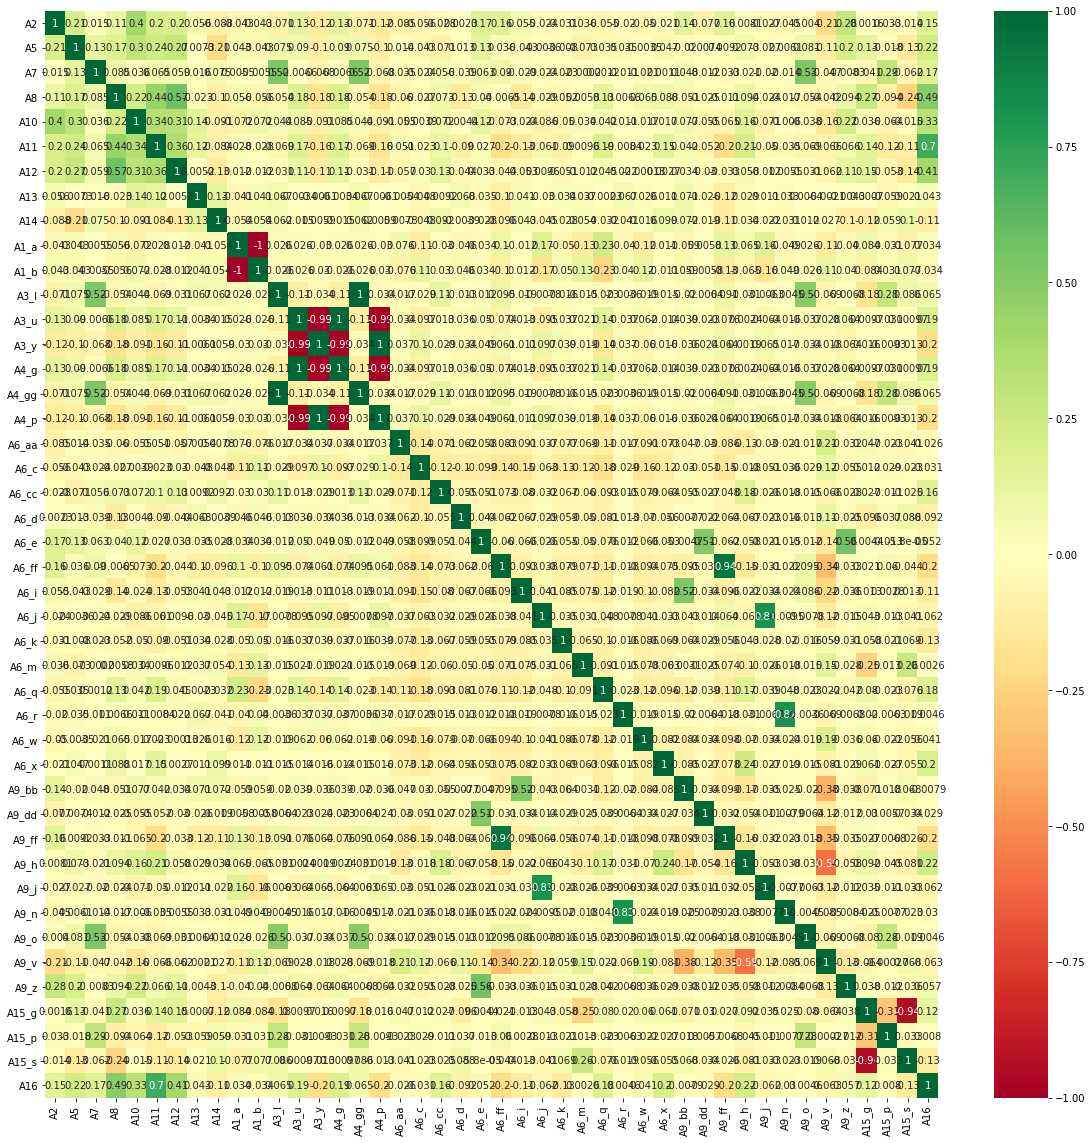

In [4]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
p=df.columns
p

Index(['A2', 'A5', 'A7', 'A8', 'A10', 'A11', 'A12', 'A13', 'A14', 'A1_a',
       'A1_b', 'A3_l', 'A3_u', 'A3_y', 'A4_g', 'A4_gg', 'A4_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A9_bb', 'A9_dd', 'A9_ff',
       'A9_h', 'A9_j', 'A9_n', 'A9_o', 'A9_v', 'A9_z', 'A15_g', 'A15_p',
       'A15_s', 'A16'],
      dtype='object')

In [6]:
Features=['A6_m', 'A9_o', 'A6_r', 'A9_bb', 'A15_p', 'A6_aa', 'A9_dd', 'A9_n',
       'A6_c', 'A1_a', 'A1_b', 'A6_w', 'A13', 'A6_e', 'A9_z', 'A6_j', 'A9_j',
       'A9_v', 'A3_l', 'A4_gg', 'A6_d', 'A14', 'A6_i', 'A15_g', 'A15_s',
       'A6_k', 'A2', 'A6_cc', 'A7', 'A6_q', 'A4_g', 'A3_u', 'A3_y', 'A4_p',
       'A6_x', 'A9_ff', 'A6_ff', 'A5', 'A9_h', 'A10', 'A12', 'A8', 'A11',]

subdata = df.loc[:,Features+['A16']]
subData=subdata.dropna(subset=Features)

X=subData.loc[:,Features]
Y=subData.loc[:,['A16']]

In [7]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [ 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8,9, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7,8,9,10],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.35,0.4,0.45,0.5 , 0.7 ]
    
}

In [8]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [9]:

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [10]:
classifier=xgboost.XGBClassifier()

In [11]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=25,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [12]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,Y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    5.4s finished
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Time taken: 0 hours 0 minutes and 5.81 seconds.


In [13]:
X.head()

,A6_m,A9_o,A6_r,A9_bb,A15_p,A6_aa,A9_dd,A9_n,A6_c,A1_a,...,A4_p,A6_x,A9_ff,A6_ff,A5,A9_h,A10,A12,A8,A11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,1.25,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.46,1.0,3.04,6.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.50,1.0,1.50,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.54,0.0,3.75,5.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,11.25,0.0,2.50,17.0,1.0,1.0


In [14]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.3}

In [23]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [35]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,Y,cv=30)

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
score

array([0.68421053, 0.78947368, 0.68421053, 0.52631579, 0.47368421,
       1.        , 1.        , 0.94736842, 1.        , 1.        ,
       1.        , 0.84210526, 1.        , 1.        , 0.94444444,
       1.        , 0.94444444, 0.94444444, 0.83333333, 1.        ,
       1.        , 1.        , 0.55555556, 0.94444444, 1.        ,
       1.        , 1.        , 0.94444444, 0.61111111, 0.5       ])

In [37]:
score.mean()

0.8723196881091617